In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itertools import product
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,5)})

## 1. Import the data

In [2]:
df = pd.read_csv('df_final.csv')
df

,id,pre_brand,cur_brand,zone,edu,children,date,pro,cur_brand2,pre_brand2,...,enroll_age,age_period,open_rate,ctr,or_all,ctr_all,or01,ctr01,redem_rate,redem_rate1
0,1.000000e+12,13,12,3,1,2,8/31/2020,19,MJN,MJN Solutions,...,831,Stage 3,1.0,0.5,0.63,0.06,0.68,0.04,0.8,0.75
1,1.000000e+12,51,22,3,3,2,2/28/2021,19,Nestle,Parent's Choice Stage 1,...,831,Stage 3,0.0,0.0,0.09,0.03,0.10,0.07,0.0,NaN
2,1.000000e+12,11,12,1,1,3,2/28/2021,11,MJN,MJN Stage1,...,519,Stage 3,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.00
3,1.000000e+12,31,12,1,2,3,2/29/2020,12,MJN,Abbott Stage1,...,655,Stage 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000e+12,11,12,1,2,1,8/31/2020,16,MJN,MJN Stage1,...,-1226,Stage 0,0.0,0.0,0.04,0.00,0.25,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1.000060e+12,31,98,3,1,,2/28/2021,22,Others,Abbott Stage1,...,167,Stage 1,NaN,NaN,0.06,0.00,0.00,0.00,1.0,NaN
1903,1.000060e+12,33,32,2,2,1,2/28/2021,21,Abbott,Abbott Solutions,...,191,Stage 2,NaN,NaN,0.50,0.17,NaN,NaN,1.0,NaN
1904,1.000060e+12,11,12,1,3,1,2/28/2021,12,MJN,MJN Stage1,...,149,Stage 1,0.0,0.0,0.47,0.03,0.67,0.00,0.2,0.25
1905,1.000060e+12,12,12,1,1,1,2/28/2021,19,MJN,MJN Stage2,...,239,Stage 2,NaN,NaN,0.04,0.04,NaN,NaN,0.0,NaN


In [3]:
df.shape

(1907, 24)

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906
id,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,...,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000070000000.0
pre_brand,13,51,11,31,11,11,11,31,21,31,...,22,31,11,13,31,31,33,11,12,11
cur_brand,12,22,12,12,12,12,12,32,32,12,...,22,32,12,12,98,98,32,12,12,12
zone,3,3,1,1,1,1,1,1,3,4,...,1,2,1,1,0,3,2,1,1,1
edu,1,3,1,2,2,2,3,2,1,1,...,2,2,1,2,3,1,2,3,1,1
children,2,2,3,3,1,1,2,2,2,3,...,1,3,1,1,2,,1,1,1,3
date,8/31/2020,2/28/2021,2/28/2021,2/29/2020,8/31/2020,8/31/2020,11/30/2020,8/31/2020,8/31/2020,11/30/2020,...,11/30/2020,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021
pro,19,19,11,12,16,16,16,16,14,21,...,19,21,13,21,19,22,21,12,19,19
cur_brand2,MJN,Nestle,MJN,MJN,MJN,MJN,MJN,Abbott,Abbott,MJN,...,Nestle,Abbott,MJN,MJN,Others,Others,Abbott,MJN,MJN,MJN
pre_brand2,MJN Solutions,Parent's Choice Stage 1,MJN Stage1,Abbott Stage1,MJN Stage1,MJN Stage1,MJN Stage1,Abbott Stage1,Nestle Stage 1,Abbott Stage1,...,Nestle Stage 2,Abbott Stage1,MJN Stage1,MJN Solutions,Abbott Stage1,Abbott Stage1,Abbott Solutions,MJN Stage1,MJN Stage2,MJN Stage1


## 2. Variable Types

In [5]:
# identify the categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']

# number of categorical variables
len(cat_vars)

11

In [6]:
# identify the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars ]

# number of numerical variables
len(num_vars)

13

## 3. Missing Values

In [7]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals) and display the result ordered by % of missing data
df[vars_with_na].isnull().mean().sort_values(ascending=False)

redem_rate1    0.785527
open_rate      0.742003
ctr            0.742003
or01           0.404300
ctr01          0.404300
redem_rate     0.178291
pre_brand2     0.005768
or_all         0.004719
ctr_all        0.004719
dtype: float64

In [8]:
# for the people with email/coupon engagement as "nan", it's fair to set the values with 0
df['redem_rate1'] = df['redem_rate1'].fillna(0)
df['open_rate'] = df['open_rate'].fillna(0)
df['ctr'] = df['ctr'].fillna(0)
df['or01'] = df['or01'].fillna(0)
df['ctr01'] = df['ctr01'].fillna(0)
df['redem_rate'] = df['redem_rate'].fillna(0)
df['or_all'] = df['or_all'].fillna(0)
df['ctr_all'] = df['ctr_all'].fillna(0)

In [9]:
# deal with outliers in "children" column 
df['children'] = df['children'].replace(' ', 0)

In [10]:
df['children'].unique()

array(['2', '3', '1', 0], dtype=object)

In [11]:
# deal with outliers in "pre_brand2" column
df['pre_brand2'] = df['pre_brand2'].replace(np.nan, "Others")

In [12]:
df.head()

,id,pre_brand,cur_brand,zone,edu,children,date,pro,cur_brand2,pre_brand2,...,enroll_age,age_period,open_rate,ctr,or_all,ctr_all,or01,ctr01,redem_rate,redem_rate1
0,1.000000e+12,13,12,3,1,2,8/31/2020,19,MJN,MJN Solutions,...,831,Stage 3,1.0,0.5,0.63,0.06,0.68,0.04,0.8,0.75
1,1.000000e+12,51,22,3,3,2,2/28/2021,19,Nestle,Parent's Choice Stage 1,...,831,Stage 3,0.0,0.0,0.09,0.03,0.10,0.07,0.0,0.00
2,1.000000e+12,11,12,1,1,3,2/28/2021,11,MJN,MJN Stage1,...,519,Stage 3,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
3,1.000000e+12,31,12,1,2,3,2/29/2020,12,MJN,Abbott Stage1,...,655,Stage 3,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
4,1.000000e+12,11,12,1,2,1,8/31/2020,16,MJN,MJN Stage1,...,-1226,Stage 0,0.0,0.0,0.04,0.00,0.25,0.00,0.0,0.00


In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906
id,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,1000000000000.0,...,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000060000000.0,1000070000000.0
pre_brand,13,51,11,31,11,11,11,31,21,31,...,22,31,11,13,31,31,33,11,12,11
cur_brand,12,22,12,12,12,12,12,32,32,12,...,22,32,12,12,98,98,32,12,12,12
zone,3,3,1,1,1,1,1,1,3,4,...,1,2,1,1,0,3,2,1,1,1
edu,1,3,1,2,2,2,3,2,1,1,...,2,2,1,2,3,1,2,3,1,1
children,2,2,3,3,1,1,2,2,2,3,...,1,3,1,1,2,0,1,1,1,3
date,8/31/2020,2/28/2021,2/28/2021,2/29/2020,8/31/2020,8/31/2020,11/30/2020,8/31/2020,8/31/2020,11/30/2020,...,11/30/2020,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021,2/28/2021
pro,19,19,11,12,16,16,16,16,14,21,...,19,21,13,21,19,22,21,12,19,19
cur_brand2,MJN,Nestle,MJN,MJN,MJN,MJN,MJN,Abbott,Abbott,MJN,...,Nestle,Abbott,MJN,MJN,Others,Others,Abbott,MJN,MJN,MJN
pre_brand2,MJN Solutions,Parent's Choice Stage 1,MJN Stage1,Abbott Stage1,MJN Stage1,MJN Stage1,MJN Stage1,Abbott Stage1,Nestle Stage 1,Abbott Stage1,...,Nestle Stage 2,Abbott Stage1,MJN Stage1,MJN Solutions,Abbott Stage1,Abbott Stage1,Abbott Solutions,MJN Stage1,MJN Stage2,MJN Stage1


In [14]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals), and display the result ordered by % of missing data
df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

## 4. EDA

In [15]:
# choose relevant columns
df1 = df[['cur_brand2', 'pre_brand2','zone2','edu2','children','pro2','enroll_type2','age_period','or01','ctr01', 'redem_rate1']]

In [16]:
df1.head()

,cur_brand2,pre_brand2,zone2,edu2,children,pro2,enroll_type2,age_period,or01,ctr01,redem_rate1
0,MJN,MJN Solutions,Others,Elementary School,2,Ontario,Self Enrolled,Stage 3,0.68,0.04,0.75
1,Nestle,Parent's Choice Stage 1,Others,High School,2,Ontario,Self Enrolled,Stage 3,0.10,0.07,0.00
2,MJN,MJN Stage1,MJN,Elementary School,3,Alberta,Self Enrolled,Stage 3,0.00,0.00,0.00
3,MJN,Abbott Stage1,MJN,Elementary School,3,British Columbia,Self Enrolled,Stage 3,0.00,0.00,0.00
4,MJN,MJN Stage1,MJN,Elementary School,1,Nova Scotia,Self Enrolled,Stage 0,0.25,0.00,0.00


In [17]:
# visualization function 1
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 -0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

In [18]:
# visualization function 2
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

### 4.1 Target Variable:

Text(0, 0.5, 'Count')

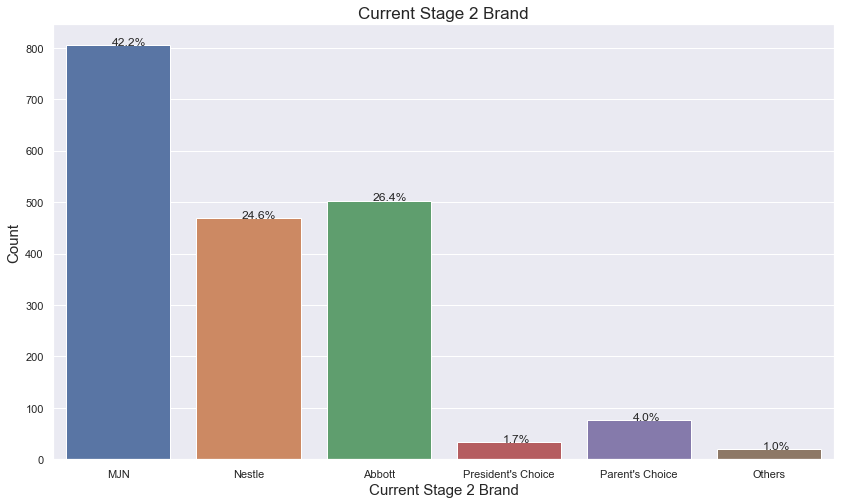

In [19]:
# plot with percentage
sns.set(rc={'figure.figsize':(14,8)})
plt.title('Current Stage 2 Brand', fontsize=17)
sns.set(rc={'figure.figsize':(12,6)})

ax = sns.countplot(x="cur_brand2", data=df1)
without_hue(ax, df1.cur_brand2)
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [20]:
df1[df1['cur_brand2'] == 'MJN'].shape

(805, 11)

In [21]:
# since we only care if the current brand is our organization, we can conduct the following manipulation:
df1['cur_brand3'] = df1['cur_brand2'].apply(lambda x: 1 if x == 'MJN' else 0)
df1

,cur_brand2,pre_brand2,zone2,edu2,children,pro2,enroll_type2,age_period,or01,ctr01,redem_rate1,cur_brand3
0,MJN,MJN Solutions,Others,Elementary School,2,Ontario,Self Enrolled,Stage 3,0.68,0.04,0.75,1
1,Nestle,Parent's Choice Stage 1,Others,High School,2,Ontario,Self Enrolled,Stage 3,0.10,0.07,0.00,0
2,MJN,MJN Stage1,MJN,Elementary School,3,Alberta,Self Enrolled,Stage 3,0.00,0.00,0.00,1
3,MJN,Abbott Stage1,MJN,Elementary School,3,British Columbia,Self Enrolled,Stage 3,0.00,0.00,0.00,1
4,MJN,MJN Stage1,MJN,Elementary School,1,Nova Scotia,Self Enrolled,Stage 0,0.25,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,Others,Abbott Stage1,Others,Elementary School,0,Saskatchewan,CoReg,Stage 1,0.00,0.00,0.00,0
1903,Abbott,Abbott Solutions,Others,Elementary School,1,Quebec,Self Enrolled,Stage 2,0.00,0.00,0.00,0
1904,MJN,MJN Stage1,MJN,High School,1,British Columbia,Self Enrolled,Stage 1,0.67,0.00,0.25,1
1905,MJN,MJN Stage2,MJN,Elementary School,1,Ontario,Self Enrolled,Stage 2,0.00,0.00,0.00,1


### 4.2 Input Variable 1 (Behavioral 1): Previous Brand

In [22]:
df1['pre_brand2'].unique()

array(['MJN Solutions', "Parent's Choice Stage 1", 'MJN Stage1',
       'Abbott Stage1', 'Nestle Stage 1', "Parent's Choice Stage 2",
       'Abbott Solutions', 'Nestle Solutions', 'Nestle Stage 2',
       'Abbott Stage2', 'MJN Stage2', 'Kirkland Stage 1',
       'Abbott Specialty', "President's Choice Stage 2",
       'Kirkland Solutions', 'Others', 'MJN Specialty'], dtype=object)

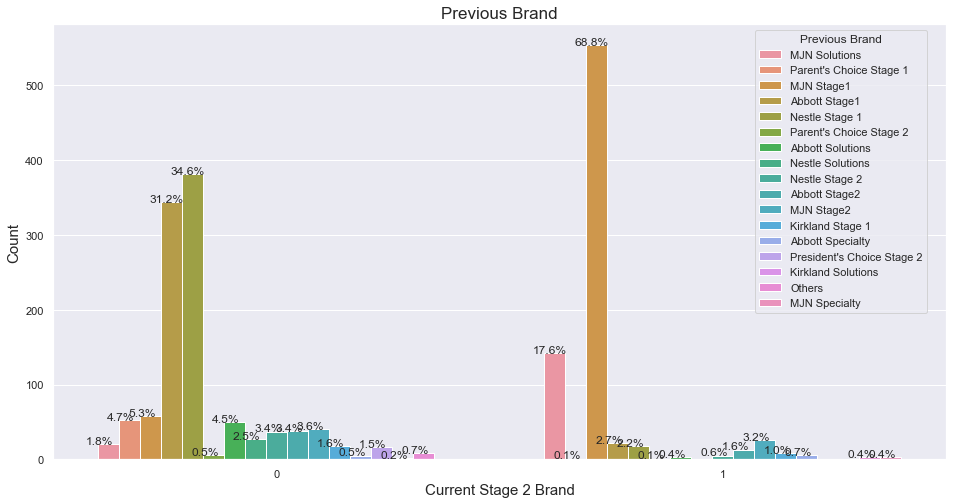

In [23]:
#  previous brand distribution in different segment (current brand is our brand VS other brands)
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.countplot(x="cur_brand3", hue='pre_brand2', data=df1)
plt.title('Previous Brand', fontsize=17)

plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)
with_hue(ax,df1.cur_brand3 ,2,17)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.78, 1), title='Previous Brand')

### 4.3 Input Variable 2 (Demographic 1): Hospital Zone

In [24]:
df1['zone2'].unique()

array(['Others', 'MJN'], dtype=object)

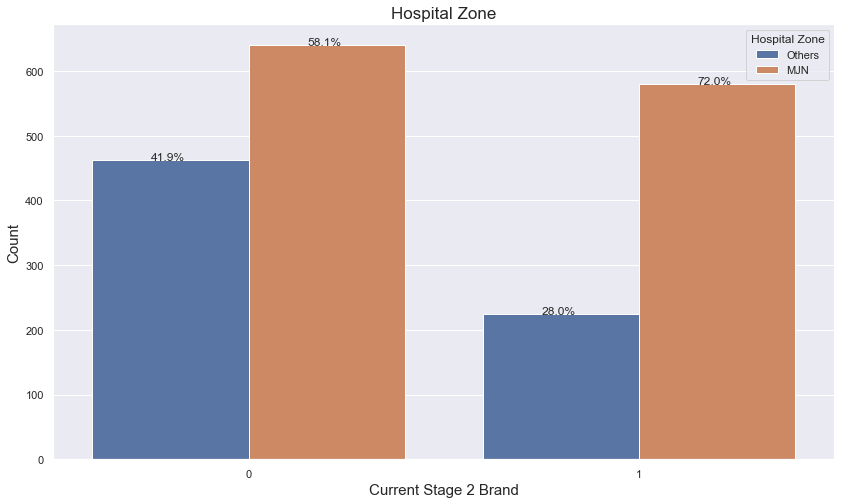

In [25]:
# plot with percentage
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.countplot(x="cur_brand3", hue='zone2', data=df1)
plt.title('Hospital Zone', fontsize=17)
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

with_hue(ax,df1.cur_brand3 ,2,2)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.88, 1), title='Hospital Zone')

### 4.4 Input Variable 3 (Demographic 2) : Province

In [26]:
df1['pro2'].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Manitoba', 'Saskatchewan',
       'Newfoundland & Labrador', 'Northwest Territories', 'Others',
       'Prince Edward Island', 'Yukon'], dtype=object)

In [27]:
len(df1['pro2'].unique())

13

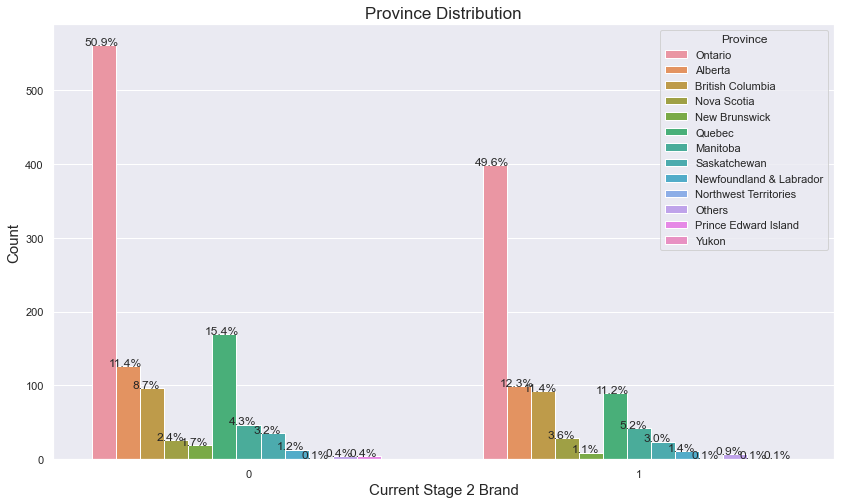

In [28]:
# plot with percentage
ax = sns.countplot(x="cur_brand3", hue='pro2', data=df1)
plt.title('Province Distribution', fontsize=17)

plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

with_hue(ax,df1.cur_brand3 ,2,13)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.77, 1), title='Province')

### 4.5 Input Variable 4 (Demographic 3): Education

In [29]:
df1['edu2'].unique()

array(['Elementary School', 'High School', 'Others'], dtype=object)

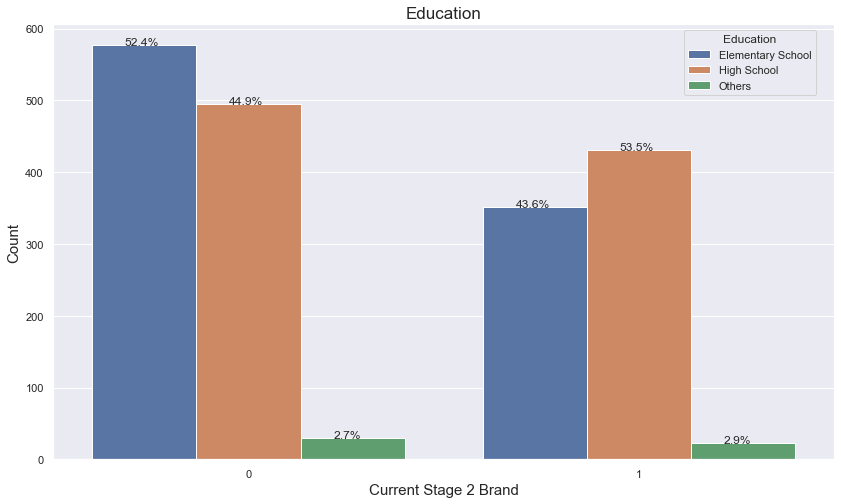

In [30]:
# plot with percentage
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.countplot(x="cur_brand3", hue='edu2', data=df1)
plt.title('Education', fontsize=17)
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

with_hue(ax,df1.cur_brand3 ,2,3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.8, 1), title='Education')

### 4.6 Input Variable 5 (Demographic 4): Number of Children

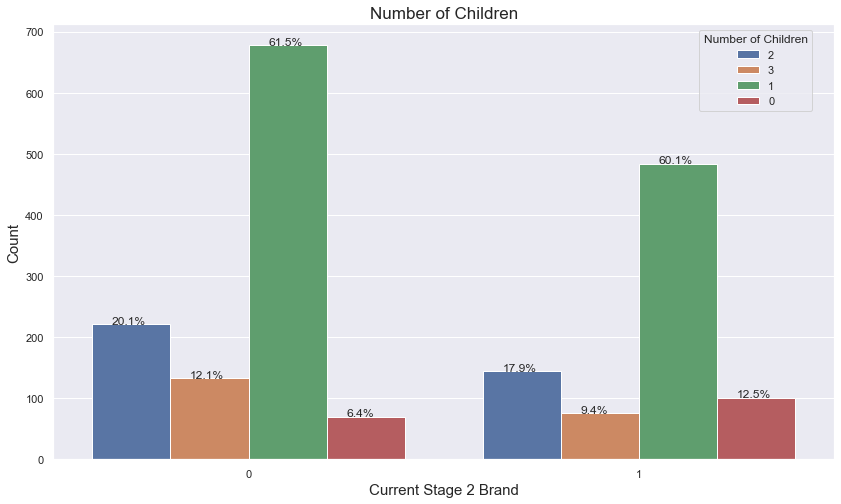

In [31]:
# plot with percentage
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.countplot(x="cur_brand3", hue='children', data=df1)
plt.title('Number of Children', fontsize=17)
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)
with_hue(ax,df1.cur_brand3 ,2,4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.82, 1), title='Number of Children')

### 4.7 Input Variable 6 (Behavioral 2): Enrollment Type

In [32]:
df1['enroll_type2'].unique()

array(['Self Enrolled', 'CoReg', 'Purchased', 'Others'], dtype=object)

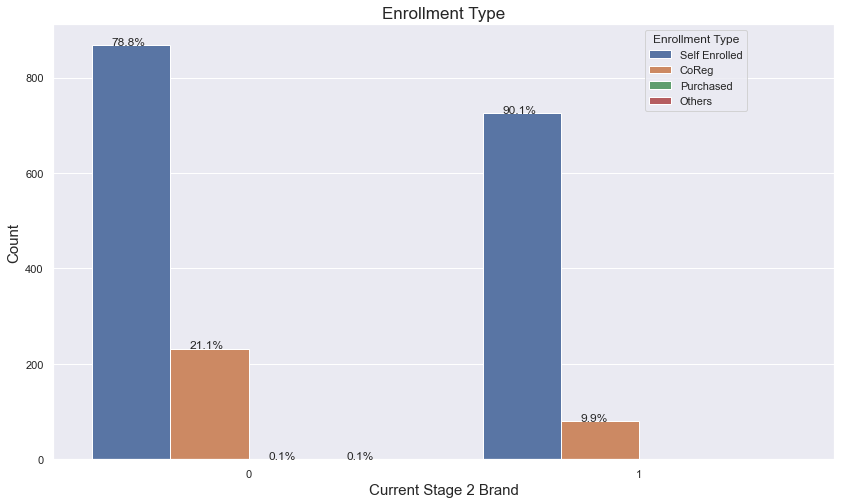

In [33]:
# plot with percentage
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.countplot(x="cur_brand3", hue='enroll_type2', data=df1)
plt.title('Enrollment Type', fontsize=17)
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)
with_hue(ax,df1.cur_brand3 ,2,4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.75, 1), title='Enrollment Type')

### 4.8 Input Variables 7 (Behavioral 3): Enrollment Age

In [34]:
df1['age_period'].unique()

array(['Stage 3', 'Stage 0', 'Stage 2', 'Stage 1'], dtype=object)

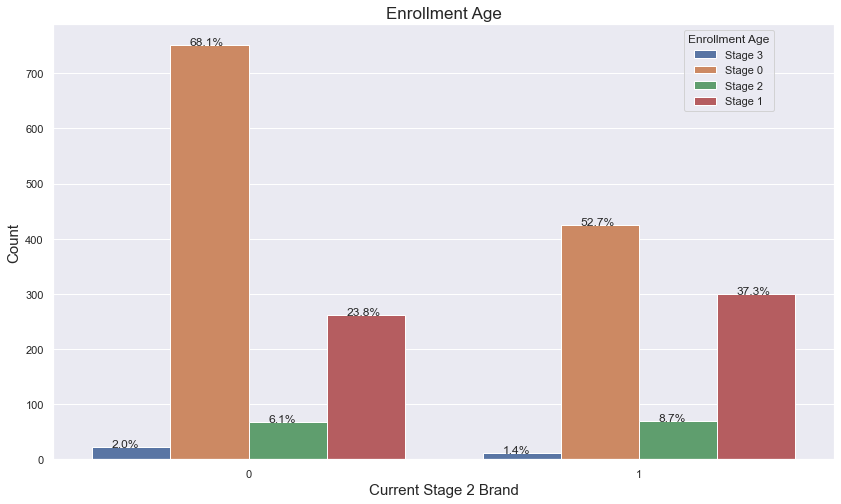

In [35]:
# plot with percentage
ax = sns.countplot(x="cur_brand3", hue='age_period', data=df1)
plt.title('Enrollment Age', fontsize=17)
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)
with_hue(ax,df1.cur_brand3 ,2,4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.8, 1), title='Enrollment Age')

### 4.9 Input Variables 8 (Behavioral 4): "Prenatal" and "Newborn" Email Open Rate

Text(0, 0.5, 'Count')

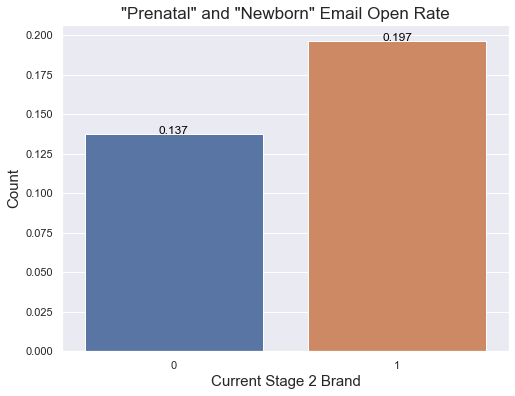

In [36]:
# plot with percentage
sns.set(rc={'figure.figsize':(8,6)})
df48 = pd.pivot_table(df1,index='cur_brand3', values='or01', aggfunc='mean')
sns.barplot(x=df48.index, y="or01", data=df48)

g = sns.barplot(x=df48.index, y="or01", data=df48)
for index, row in df48.iterrows():
    g.text(row.name,row.or01, round(row.or01,3), color='black', ha="center")
    
plt.title('"Prenatal" and "Newborn" Email Open Rate', fontsize=17)
 
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

### 4.10 Input Variables 9 (Behavioral 5): "Prenatal" and "Newborn" Email Click Through Rate

Text(0, 0.5, 'Count')

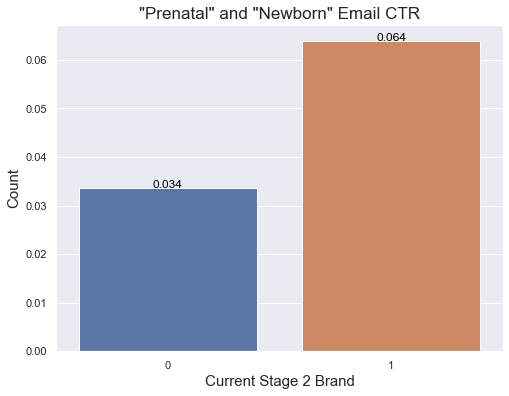

In [37]:
# plot with percentage
df49 = pd.pivot_table(df1,index='cur_brand3', values='ctr01', aggfunc='mean')

plt.title('"Prenatal" and "Newborn" Email Click Through Rate', fontsize=15)

g = sns.barplot(x=df49.index, y="ctr01", data=df49)
for index, row in df49.iterrows():
    g.text(row.name,row.ctr01, round(row.ctr01,3), color='black', ha="center")
    
plt.title('"Prenatal" and "Newborn" Email CTR', fontsize=17)
 
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

### 4.11 Input Variables 10 (Behavioral 6): Stage 1 Coupon Redemption Rate

Text(0, 0.5, 'Count')

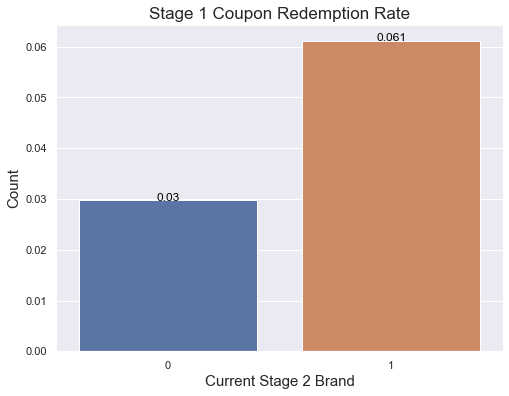

In [38]:
# plot with percentage
df410 = pd.pivot_table(df1,index='cur_brand3', values='redem_rate1', aggfunc='mean')
plt.title('Stage 1 Coupon Redemption Rate', fontsize=15)
g = sns.barplot(x=df410.index, y="redem_rate1", data=df410)
for index, row in df410.iterrows():
    g.text(row.name,row.redem_rate1, round(row.redem_rate1,3), color='black', ha="center")

plt.title('Stage 1 Coupon Redemption Rate', fontsize=17)
 
plt.xlabel('Current Stage 2 Brand', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [39]:
# save the file for the modelling section
df1.to_csv('df_eda_final', index=False)